<h1 align=center><font size = 10, color = red>Model Development</font></h1>

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [284]:
#path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
#df = pd.read_csv(path)
df=pd.read_csv("automobile(for Analysis).csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h1><font size = 5, color = blue>1. Linear Regression and Multiple Linear Regression</font></h1>

<h4>Linear Regression</h4>
<br>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
    
$$
Linear function: Yhat = a + b  X
$$
<ul>
    <li>a refers to the <b>intercept</b>, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b>, in other words: Y changes when X increases</li>
</ul>

In [4]:
#load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [23]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
X,Y = df[['highway-mpg']], df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print('Yhat=',lm.intercept_, lm.coef_[0],'X', sep='')

Yhat=38423.305858157415-821.733378321926X


In [40]:
Yhat=lm.predict(X)
Yhat[0:3]   

array([16236.50464347, 16236.50464347, 17058.23802179])

In [42]:
list(Y[0:3])

[13495.0, 16500.0, 16500.0]

In [54]:
#Create a new linear regression object
lm1=LinearRegression()
lm1.fit(df[['engine-size']],df['price'])
lm1.intercept_+lm1.coef_[0]*df['engine-size'][0]

13728.463133603032

<h4>Multiple Linear Regression</h4>

In [61]:
lm3=LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size']]
lm3.fit(Z, df['price'])
lm3.intercept_+lm3.coef_[0]*df['horsepower'][0]+lm3.coef_[1]*df['curb-weight'][0]+lm3.coef_[2]*df['engine-size'][0]

13809.661098271075

In [58]:
lm3.predict(Z)[0]

13809.661098271077

<h1><font size = 5, color = blue>2. Model Evaluation using Visualization</font></h1>

<ul>
    <li>Regression Plot (Simple Linear Regression)</li>
    <li>Residual Plot (Simple Linear Regression)</li>
    <li>Distribution Plot (Multi Linear Regression)</li>
</ul>

In [62]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h5>Regression Plot (Simple Linear Regression)</h5>

(0.0, 48262.246447562684)

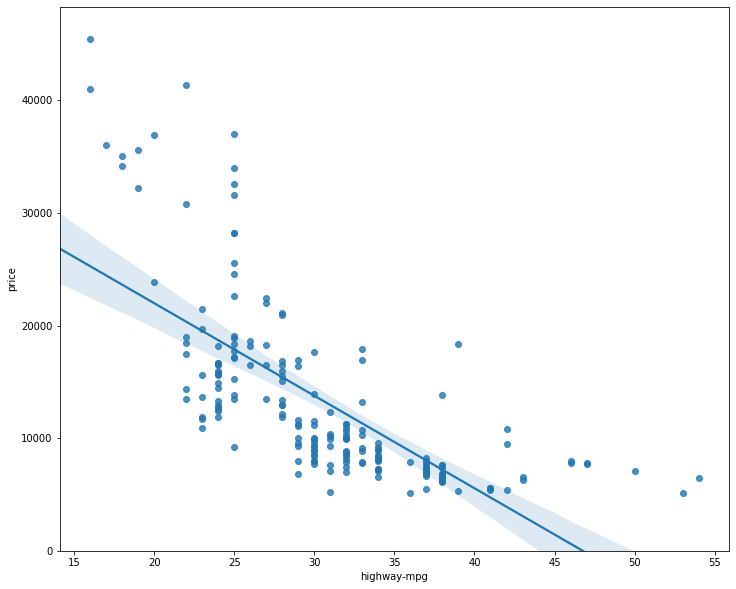

In [63]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<h5>Residual Plot (Simple Linear Regression)</h5>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). </p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

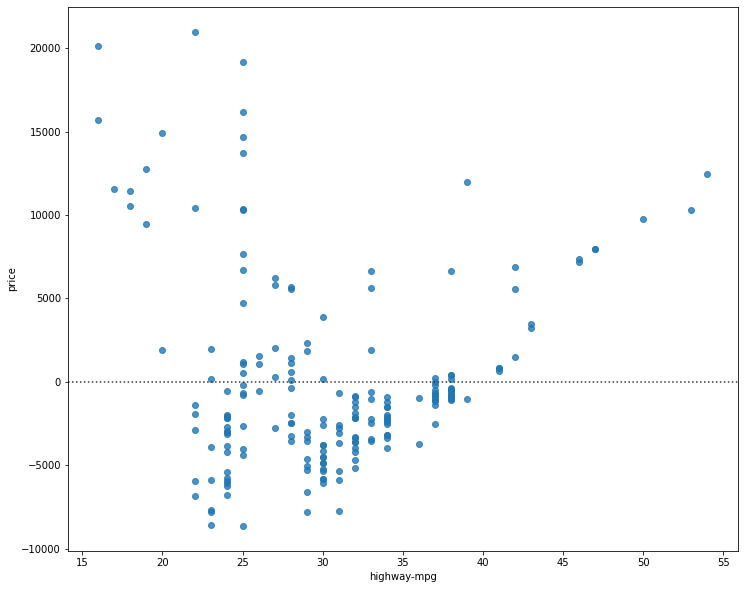

In [64]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<p>the residuals are not randomly spread around the x-axis, maybe a non-linear model is more appropriate for this data.</p>

<h5>Distribution Plot (Multiple Linear Regression)</h5>

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

In [73]:
Y_hat3 = lm3.predict(Z)

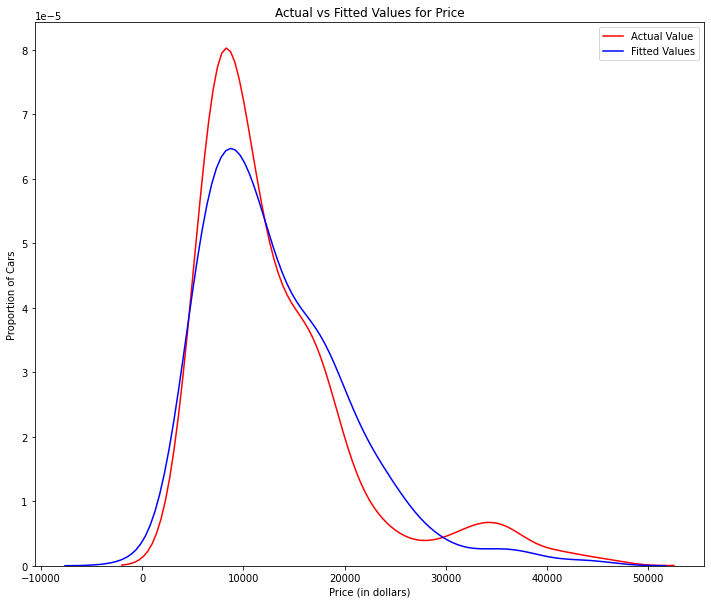

In [76]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat3, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h1><font size = 5, color = blue>3. Polynomial Regression and Pipelines</font></h1>

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>
    
<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

<p>We will use the following function to plot the data:</p>

In [77]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05] <class 'numpy.ndarray'> 

         3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05 <class 'numpy.poly1d'>


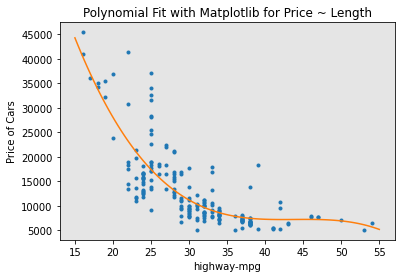

In [88]:
x = df['highway-mpg']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

print(f,type(f),'\n\n',p,type(p))
PlotPolly(p, x, y, 'highway-mpg')

We can perform a polynomial transform on <b>multiple features (not only 'highway-mpg')</b>.

In [89]:
#First, we import the module:
from sklearn.preprocessing import PolynomialFeatures
#We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [102]:
Z_pr=pr.fit_transform(Z)

#The original data is of 201 samples and 3 features 
print(Z.shape)
#after the transformation, there 201 samples and 10 features
print(Z_pr.shape)

(201, 3)
(201, 10)


In [100]:
#Z ist now transformed
Z_pr[0]

array([1.000000e+00, 1.110000e+02, 2.548000e+03, 1.300000e+02,
       1.232100e+04, 2.828280e+05, 1.443000e+04, 6.492304e+06,
       3.312400e+05, 1.690000e+04])

In [103]:
type(Z_pr)

numpy.ndarray

<h2>Pipeline</h2>

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>



In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [107]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
Input, type(Input)

([('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('polynomial',
   PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                      order='C')),
  ('model',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))],
 list)

In [108]:
#we input the list as an argument to the pipeline constructor 
pipe=Pipeline(Input)
pipe, type(pipe)

(Pipeline(memory=None,
          steps=[('scale',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('polynomial',
                  PolynomialFeatures(degree=2, include_bias=False,
                                     interaction_only=False, order='C')),
                 ('model',
                  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                   normalize=False))],
          verbose=False), sklearn.pipeline.Pipeline)

In [110]:
#We can normalize the data,  perform a transform and fit the model simultaneously. 
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [111]:
# Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12653.67422935, 12653.67422935, 18391.17839445, 10484.47398951])

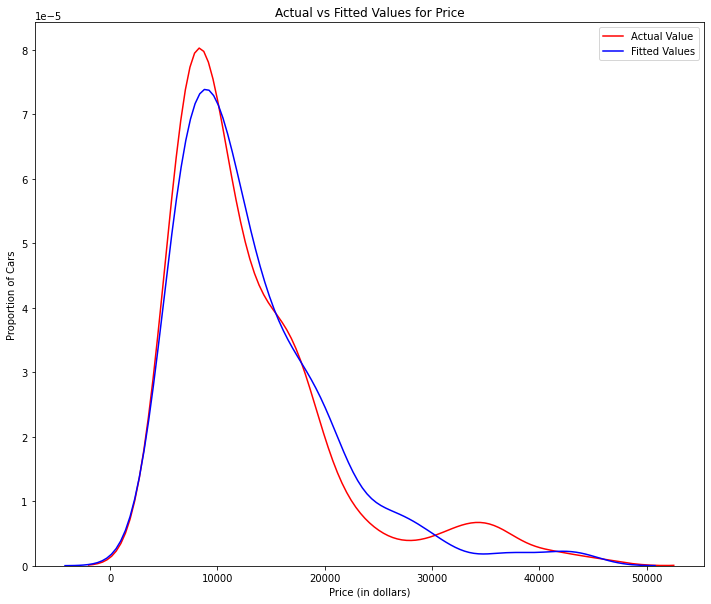

In [133]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [114]:
#a pipeline that Standardizes the data, then perform prediction using a linear regression model
#no ('polynomial', PolynomialFeatures(include_bias=False))

#Input1=[('scale',StandardScaler()),('model',LinearRegression())]

pipe1=Pipeline([('scale',StandardScaler()),('model',LinearRegression())])

pipe1.fit(Z,y)

ypipe1=pipe1.predict(Z)

ypipe1[0:4]


array([13809.66109827, 13809.66109827, 18984.18562448, 10676.21621133])

<h1><font size = 5, color = blue>4. Measures for In-Sample Evaluation</font></h1>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

In [121]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square (score) is: ', lm.score(X, Y))

The R-square (score) is:  0.4965911884339176


In [122]:
#calculating the MSE
from sklearn.metrics import mean_squared_error
Yhat=lm.predict(X)
mse = mean_squared_error(Y, Yhat)
print('MSE: ', mse)

MSE:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>

In [120]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square (score) is: ', lm.score(Z, df['price']))

The R-square (score) is:  0.8091263794284135


In [119]:
Y_predict_multifit = lm.predict(Z)
print('MSE: ', mean_squared_error(df['price'], Y_predict_multifit))

MSE:  11994814.244502736


<h3>Model 3: Polynomial Fit</h3>

In [123]:
#we are using a different function: import the function <b>r2_score</b> from the module <b>metrics</b> 
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [125]:
print('MSE: ',mean_squared_error(df['price'], p(x)))

MSE:  20474146.426361218


<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497   <b>   >>> this is the best score</b></li>
    <li>MSE: 1.2 x10^7                   <b>   >>> this is the best MSE</b></li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>

In [134]:
#the end

In [129]:
pipe.score(Z,Y)  # multi feature in polynomial is the aller beste model

0.8395026206980695

In [130]:
 mean_squared_error(df['price'], ypipe)

10085920.96535487

SUMMARY

In [289]:
#libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline      import Pipeline
from sklearn.metrics       import mean_squared_error
from sklearn.metrics       import r2_score

In [288]:
df=pd.read_csv("automobile(for Analysis).csv")
#df=df[df['price']<35000]
print(df.shape)
target='price'
corr=0.5

(201, 29)


In [282]:
best=df.corr()[target].sort_values().to_frame()
a=best[target]>corr
b=best[target]<-corr
c=best[target]<1.0
best=list(best[(a|b)&c].index)

x=df[best]
y=df[target]

pipe2=Pipeline([('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())])
pipe2.fit(x,y)
pipe2.score(x,y)

0.9422094488015265

In [367]:
corries=np.arange(1,9)/10
nn=np.arange(1,4)
score=[]
cor=[]
nns=[]
for corr in corries:
    for j in nn:
        best=df.corr()[target].sort_values().to_frame()
        a=best[target]>corr
        b=best[target]<-corr
        c=best[target]<1.0
        best=list(best[(a|b)&c].index)

        x=df[best]
        y=df[target]
    
        pipe2=Pipeline([('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=j,include_bias=False)), ('model',LinearRegression())])
        pipe2.fit(x,y)
        score.append(pipe2.score(x,y))
        cor.append(corr)
        nns.append(j)

In [379]:
aaa=pd.DataFrame(data={'corr':cor,'scores':score,'n':nns})
aaa
#aaa.sort_values(by=['scores'],ascending=False)

,corr,scores,n
0,0.1,0.854206,1
1,0.1,0.984388,2
2,0.1,0.999101,3
3,0.2,0.835234,1
4,0.2,0.954634,2
5,0.2,0.998631,3
6,0.3,0.835234,1
7,0.3,0.954634,2
8,0.3,0.998631,3
9,0.4,0.835234,1


<AxesSubplot:xlabel='corr', ylabel='scores'>

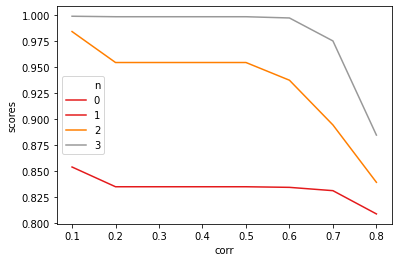

In [389]:
sns.lineplot(x="corr",y="scores",data=aaa,hue="n", palette="Set1")